In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

df = pd.read_csv('data.csv')
list = ['Unnamed: 32','id']
df.drop(list,axis = 1, inplace = True)


In [2]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_2 = pd.DataFrame(df[['radius_mean', 'texture_mean', 'perimeter_mean', 
                        'smoothness_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 
                        'texture_se', 'area_se', 'fractal_dimension_mean', 'diagnosis']])



In [4]:
df_2.head()

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,area_mean,concavity_mean,compactness_mean,texture_se,area_se,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,0.11840,1001.0,0.3001,0.27760,0.9053,153.40,0.07871,M
1,20.57,17.77,132.90,0.08474,1326.0,0.0869,0.07864,0.7339,74.08,0.05667,M
2,19.69,21.25,130.00,0.10960,1203.0,0.1974,0.15990,0.7869,94.03,0.05999,M
3,11.42,20.38,77.58,0.14250,386.1,0.2414,0.28390,1.1560,27.23,0.09744,M
4,20.29,14.34,135.10,0.10030,1297.0,0.1980,0.13280,0.7813,94.44,0.05883,M


In [5]:
non_numeric = ['diagnosis']

df_numeric = df.drop(non_numeric, axis = 1)

m = TSNE(learning_rate = 50)
tsne_features = m.fit_transform(df_numeric)
tsne_features

array([[-11.385984, -24.04308 ],
       [-14.147837, -24.688736],
       [-15.592724, -20.052498],
       ...,
       [-21.343119,  -2.357842],
       [-14.689004, -22.506027],
       [ 26.053383, -25.826923]], dtype=float32)

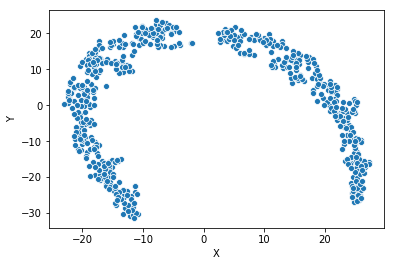

In [6]:
tsne_features[1:4, :]
df["X"] = tsne_features[:,0]
df["Y"] = tsne_features[:,1]

sns.scatterplot(x = "X", y = "Y", data = df)

plt.show()



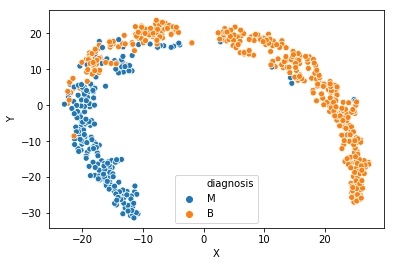

In [7]:
tsne_features[1:4, :]
df["X"] = tsne_features[:,0]
df["Y"] = tsne_features[:,1]

sns.scatterplot(x = "X", y = "Y",hue = 'diagnosis', data = df)

plt.show()



In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_numeric = pd.DataFrame(ss.fit_transform(df_numeric.values.reshape(-1,1)))


In [11]:
n = TSNE(learning_rate = 50)
tsne_features = n.fit_transform(df_numeric)
tsne_features

array([[ 39.8127    ,  -7.389691  ],
       [-32.82696   , -21.012777  ],
       [-50.597366  ,  -7.88215   ],
       ...,
       [-22.283684  , -57.41455   ],
       [-14.90153   , -20.504776  ],
       [-12.450404  ,   0.22485799]], dtype=float32)

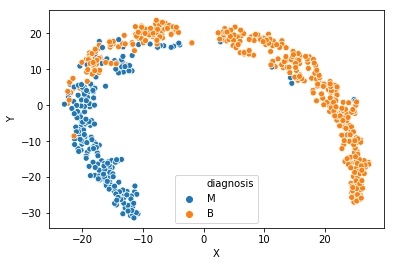

In [12]:
tsne_features[1:4, :]

df_numeric["X"] = tsne_features[:,0]
df_numeric["Y"] = tsne_features[:,1]

sns.scatterplot(x = "X", y = "Y",hue = 'diagnosis', data = df)

plt.show()

